# GitHub does not support Animation. Plese visit website below to watch the animation:
# https://nbviewer.jupyter.org/github/patrickcyi/COVID_Visualization/blob/main/chongyue_COVID19_data_vis_022021-finalversion.ipynb

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go 
warnings.filterwarnings('ignore') 
import datetime 
import math
import pycountry
import sys
import plotly.express as px
from plotly.subplots import make_subplots

# import data, worldwide number of confirmed cases, deaths cases, recoveried cases, and medical treatment 

In [54]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-16-2021.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/02-16-2021.csv')
apple_mobility = pd.read_csv("https://covid19-static.cdn-apple.com/covid19-mobility-data/2101HotfixDev19/v3/en-us/applemobilitytrends-2021-02-16.csv")

In [55]:
confirmed_df.head(3)
# show data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55473,55492,55514,55518,55540,55557,55575,55580,55604,55617
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,91987,93075,93850,94651,95726,96838,97909,99062,100246,101285
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,110513,110711,110894,111069,111247,111418,111600,111764,111917,112094


In [56]:
confirmed_df[confirmed_df['Country/Region']=='China'].head(3)
# Some countries only show Province/State data. these need to be sumed as one country
# for example China.
# Som contries show both country data and Province data, for example UK. this need data cleaning. 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21
58,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,994,994,994,994,994,994,994,994,994,994
59,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,1046,1046,1046,1046,1046,1046,1046,1046,1047,1047
60,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,591,591,591,591,591,591,591,591,591,591


In [57]:
confirmed_df['Province/State']=confirmed_df['Province/State'].fillna('Country')
deaths_df['Province/State']=deaths_df['Province/State'].fillna('Country')
recoveries_df['Province/State']=recoveries_df['Province/State'].fillna('Country')

confirmed_cases=confirmed_df[confirmed_df['Province/State']=='Country']
deaths_cases=deaths_df[deaths_df['Province/State']=='Country']
recoveries_cases=recoveries_df[recoveries_df['Province/State']=='Country']
# these countries do not need any dispo

In [58]:
# sum the state/province data to one row

countries_need_combine=confirmed_df[confirmed_df['Province/State']!='Country']['Country/Region'].unique()
countries_combine=[]

for country in countries_need_combine: # find the countries has only province data
    if country not in confirmed_df[confirmed_df['Province/State']=='Country']['Country/Region'].to_numpy():
        countries_combine.append(country)
        
print(countries_combine , 'these countries has only state data, not total country data') 
confirmed_df[confirmed_df['Country/Region']==countries_combine[2]]

for country in countries_combine:
    
    confirmed_sum_state=confirmed_df[confirmed_df['Country/Region']==country].sum(skipna=True)
    death_sum_state=deaths_df[deaths_df['Country/Region']==country].sum(skipna=True)
    recovery_sum_state=recoveries_df[recoveries_df['Country/Region']==country].sum(skipna=True)

    number_states=confirmed_df[confirmed_df['Country/Region']==country].count().values[0]
    confirmed_sum_state[0]='Country'
    confirmed_sum_state[1]=country
    confirmed_sum_state[2]/=number_states
    confirmed_sum_state[3]/=number_states
    confirmed_cases=confirmed_cases.append(confirmed_sum_state,ignore_index=True)
    
    death_sum_state[1]=country
    death_sum_state[0]='Country'
    deaths_cases=deaths_cases.append(death_sum_state,ignore_index=True)
    
    
    recovery_sum_state[1]=country
    recovery_sum_state[0]='Country'
    recoveries_cases=recoveries_cases.append(recovery_sum_state,ignore_index=True)
    
confirmed_df=confirmed_cases
deaths_df=deaths_cases
recoveries_df=recoveries_cases

confirmed_df



['Australia', 'Canada', 'China'] these countries has only state data, not total country data


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21
0,Country,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,55473,55492,55514,55518,55540,55557,55575,55580,55604,55617
1,Country,Albania,41.153300,20.168300,0,0,0,0,0,0,...,91987,93075,93850,94651,95726,96838,97909,99062,100246,101285
2,Country,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,110513,110711,110894,111069,111247,111418,111600,111764,111917,112094
3,Country,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,10463,10503,10538,10555,10583,10610,10645,10672,10699,10712
4,Country,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,20329,20366,20381,20389,20400,20452,20478,20499,20519,20548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Country,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,68454,69437,70248,70823,71677,72467,73203,73894,74503,75027
188,Country,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,35104,35172,35222,35315,35423,35543,35710,35768,35796,35862
189,Country,Australia,-32.106275,141.355487,0,0,0,0,4,5,...,28898,28900,28905,28911,28912,28918,28920,28926,28930,28937
190,Country,Canada,44.303475,-75.162369,0,0,0,0,1,1,...,828408,830612,832375,836594,839155,842590,845673,848330,850737,854190


# Build a new table wth following info: country, location, date, case numbers and sum of all countries as worldwide data

In [59]:
# calculate the sum
confirmed_df=confirmed_df.append(confirmed_df.sum(numeric_only=True), ignore_index=True)
deaths_df=deaths_df.append(deaths_df.sum(numeric_only=True), ignore_index=True)
recoveries_df=recoveries_df.append(recoveries_df.sum(numeric_only=True), ignore_index=True)
confirmed_df.iloc[-1,1]='WorldWide'
confirmed_df.iloc[-1,0]='Country'


In [60]:
#Rank all the countries as number of cases
top20=confirmed_df.sort_values(by=['2/15/21'],ascending=False)
top20
countries= top20.iloc[1:200,1]

In [61]:
top20.head(6)
# Top 5 are US, India, Brazil, UK, Russia

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21
192,Country,WorldWide,3687.696502,3781.380104,557.0,655.0,941.0,1433.0,2118.0,2927.0,...,108481056.0,108773764.0,109057061.0,109407383.0,109801690.0,110203691.0,110642931.0,111012149.0,111325387.0,111612520.0
175,Country,US,40.000000,-100.000000,1.0,1.0,2.0,2.0,5.0,5.0,...,27579257.0,27644213.0,27698190.0,27760660.0,27830489.0,27899755.0,28006110.0,28077620.0,28134115.0,28188571.0
76,Country,India,20.593684,78.962880,0.0,0.0,0.0,0.0,0.0,0.0,...,10904940.0,10916589.0,10925710.0,10937320.0,10950201.0,10963394.0,10977387.0,10991651.0,11005850.0,11016434.0
22,Country,Brazil,-14.235000,-51.925300,0.0,0.0,0.0,0.0,0.0,0.0,...,9809754.0,9834513.0,9866710.0,9921981.0,9978747.0,10030626.0,10084208.0,10139148.0,10168174.0,10195160.0
179,Country,United Kingdom,55.378100,-3.436000,0.0,0.0,0.0,0.0,0.0,0.0,...,4027106.0,4038078.0,4047843.0,4058468.0,4071185.0,4083242.0,4095269.0,4105675.0,4115509.0,4126150.0
139,Country,Russia,61.524010,105.318756,0.0,0.0,0.0,0.0,0.0,0.0,...,4012538.0,4026506.0,4040505.0,4053535.0,4066164.0,4079407.0,4092649.0,4105424.0,4117992.0,4130447.0


In [62]:
confirmed_worldwide=confirmed_df.iloc[-1,4:]
lat=0
long=0
deaths_worldwide=deaths_df.iloc[-1,4:]
recoveries_worldwide=deaths_df.iloc[-1,4:]
print(confirmed_worldwide[0]) # first day of confirmed cases


557.0


In [63]:
# convert date string to datestamp

confirmed_date=confirmed_df.columns.values.tolist()
confirmed_dates=confirmed_date[4:]
dates=[]
for date in confirmed_dates:
    dates.append( datetime.datetime.strptime(date, '%m/%d/%y'))

In [64]:
# calculated the daily new cases

new_daily_confirmed=confirmed_worldwide-confirmed_worldwide.shift(1)
new_daily_death=deaths_worldwide-deaths_worldwide.shift(1)
new_daily_recoveries=recoveries_worldwide-recoveries_worldwide.shift(1)

# Build new data table, includig:
# Date, Daily Cumulative Death, Recovery, Confirmed Cases, Daily Increases, Location, Country Name

# Perform data cleaning

In [65]:

ww_data=pd.DataFrame({'date': dates, 
                      'death': deaths_worldwide,
                      'recovery': recoveries_worldwide,
                      'confirmed': confirmed_worldwide,
                      'new_daily_confirmed':new_daily_confirmed,
                     'new_daily_recovery':new_daily_recoveries,
                     'new_daily_death':new_daily_death,
                      'lat': lat,
                      'long':long
                      
                     }
                       )
ww_data['region']='WorldWide'
ww_data.dtypes
ww_data

,date,death,recovery,confirmed,new_daily_confirmed,new_daily_recovery,new_daily_death,lat,long,region
1/22/20,2020-01-22,17,17,557,NaN,NaN,NaN,0,0,WorldWide
1/23/20,2020-01-23,18,18,655,98,1,1,0,0,WorldWide
1/24/20,2020-01-24,26,26,941,286,8,8,0,0,WorldWide
1/25/20,2020-01-25,42,42,1433,492,16,16,0,0,WorldWide
1/26/20,2020-01-26,56,56,2118,685,14,14,0,0,WorldWide
...,...,...,...,...,...,...,...,...,...,...
2/18/21,2021-02-18,2.44072e+06,2.44072e+06,1.10204e+08,402001,11161,11161,0,0,WorldWide
2/19/21,2021-02-19,2.45182e+06,2.45182e+06,1.10643e+08,439240,11100,11100,0,0,WorldWide
2/20/21,2021-02-20,2.46033e+06,2.46033e+06,1.11012e+08,369218,8508,8508,0,0,WorldWide
2/21/21,2021-02-21,2.46621e+06,2.46621e+06,1.11325e+08,313238,5878,5878,0,0,WorldWide


In [66]:
# Append all countries, sort by rank of number of cases

top50_countries= top20.iloc[1:,1]

for country in top50_countries:
    confirmed_worldwide=confirmed_df[confirmed_df['Country/Region']==country].iloc[0,4:]
    deaths_worldwide=  deaths_df[deaths_df['Country/Region']==country].iloc[0,4:]
    recoveries_worldwide= recoveries_df[recoveries_df['Country/Region']==country].iloc[0,4:]
    new_daily_confirmed=confirmed_worldwide-confirmed_worldwide.shift(1)
    new_daily_death=deaths_worldwide-deaths_worldwide.shift(1)
    new_daily_recoveries=recoveries_worldwide-recoveries_worldwide.shift(1)
    
  
    country_data=pd.DataFrame({'date': dates, 
                      'death': deaths_worldwide,
                      'recovery': recoveries_worldwide,
                      'confirmed': confirmed_worldwide,
                      'new_daily_confirmed':new_daily_confirmed,
                     'new_daily_recovery':new_daily_recoveries,
                     'new_daily_death':new_daily_death,
      #                         'lat':latt1,
       #                        'long':longt1
                              }
                              
                           )
    country_data=country_data.reset_index(drop=True)
    country_data['region']=country

    
    latt=confirmed_df[confirmed_df['Country/Region']==country]['Lat'].values
    latt=latt.repeat(len(country_data.index))
    country_data['lat']=latt
    longt=confirmed_df[confirmed_df['Country/Region']==country]['Long'].values
    longt=longt.repeat(len(country_data.index))
    country_data['long']=longt
    
    ww_data=pd.concat([ww_data,country_data])
ww_data['death_rate']=ww_data.death/ww_data.confirmed
ww_data['recovery_rate']=ww_data.recovery/ww_data.confirmed


In [67]:
ww_data.head(2)

,date,death,recovery,confirmed,new_daily_confirmed,new_daily_recovery,new_daily_death,lat,long,region,death_rate,recovery_rate
1/22/20,2020-01-22,17,17,557,NaN,NaN,NaN,0.0,0.0,WorldWide,0.0305206,0.0305206
1/23/20,2020-01-23,18,18,655,98,1,1,0.0,0.0,WorldWide,0.0274809,0.0274809


In [68]:
# list top 10 countries with most patients

line_data_countries= top20.iloc[1:9,1]
line_plot_data=ww_data[ww_data['region'] == 'WorldWide']

for country in line_data_countries:
    print(country)
    temp=ww_data[ww_data['region'] == country]
    line_plot_data=line_plot_data.append(temp)


US
India
Brazil
United Kingdom
Russia
France
Spain
Italy


In [69]:
line_plot_data['datetime']=pd.to_datetime(line_plot_data.date)
line_plot_data=line_plot_data.fillna(0.1)

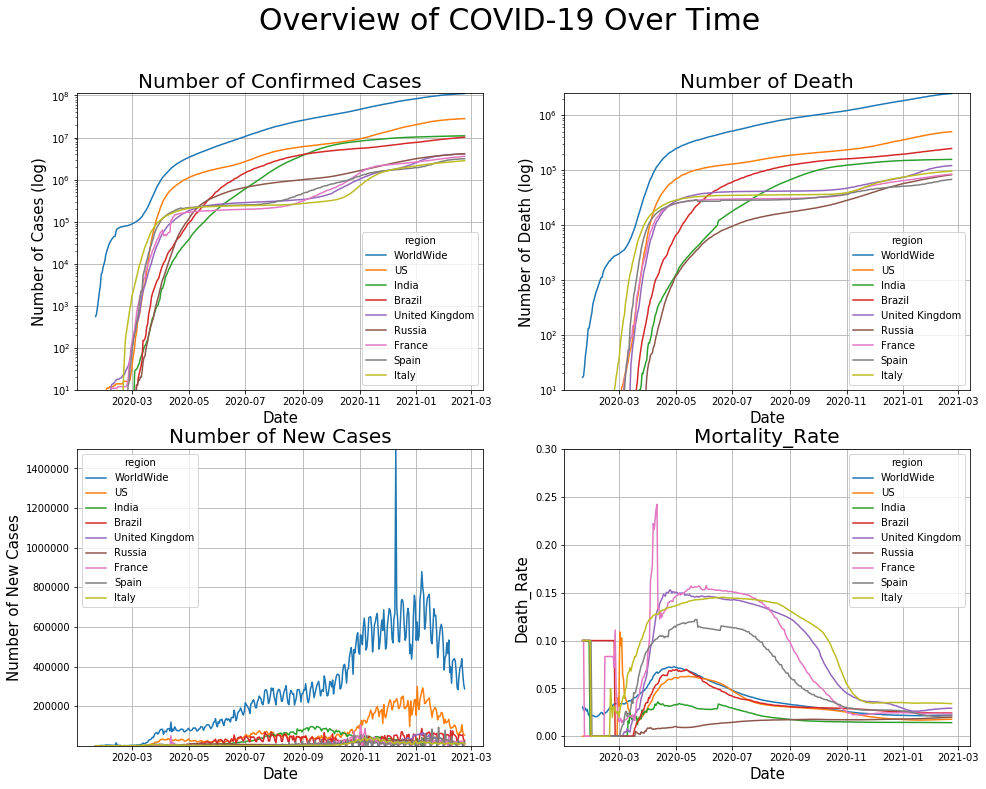

In [70]:
f, ax = plt.subplots(figsize=(16, 12), ncols=2,nrows=2)
f.suptitle('Overview of COVID-19 Over Time',fontsize=30)

sns.lineplot(ax=ax[0,0],data=line_plot_data,x="datetime", y="confirmed", hue='region')      
ax[0,0].set( yscale="log", ylim= (10, max(line_plot_data.confirmed)))    
ax[0,0].set_xlabel('Date', fontsize=15)
ax[0,0].set_ylabel('Number of Cases (log)', fontsize=15)
ax[0,0].set_title('Number of Confirmed Cases', fontsize=20)
plt.xticks(fontsize= 10)
ax[0,0].grid() 

sns.lineplot(ax=ax[0,1],data=line_plot_data,x="datetime", y="death", hue='region')      
ax[0,1].set( yscale="log", ylim= (10, max(line_plot_data.death)))    
ax[0,1].set_xlabel('Date', fontsize=15)
ax[0,1].set_ylabel('Number of Death (log)', fontsize=15)
ax[0,1].set_title('Number of Death', fontsize=20)
ax[0,1].grid() 

sns.lineplot(ax=ax[1,0],data=line_plot_data,x="datetime", y="new_daily_confirmed", hue='region')      
ax[1,0].set(  ylim= (10, max(line_plot_data.new_daily_confirmed)))    
ax[1,0].set_xlabel('Date', fontsize=15)
ax[1,0].set_ylabel('Number of New Cases', fontsize=15)
ax[1,0].set_title('Number of New Cases', fontsize=20)
ax[1,0].grid() 

sns.lineplot(ax=ax[1,1],data=line_plot_data,x="datetime", y="death_rate", hue='region')      
ax[1,1].set(  ylim= (-0.01,0.3))    
ax[1,1].set_xlabel('Date', fontsize=15)
ax[1,1].set_ylabel('Death_Rate', fontsize=15)
ax[1,1].set_title('Mortality_Rate', fontsize=20)
ax[1,1].grid() 

plt.show() 


# Animation of Mortality Rate and Number of Cases Since 01/2020

In [71]:
first_date_month=['2020-02-01','2020-02-15','2020-03-01','2020-03-15','2020-04-01','2020-04-15',
                  '2020-05-01','2020-05-15','2020-06-01','2020-06-15','2020-07-01','2020-07-15','2020-08-01',         
                    '2020-08-15','2020-09-01','2020-09-15',
                  '2020-10-01','2020-10-15','2020-11-01','2020-11-15','2020-12-01','2020-12-15',
                  '2021-01-01','2021-01-15','2021-02-01','2021-02-15']
bubble_data=ww_data[ww_data['date']=='2020-01-23']




for month in first_date_month:
  c=ww_data[ww_data['date']==month]
  #print(c)
  bubble_data=bubble_data.append(c)

bubble=bubble_data[bubble_data.region=='WorldWide']
top10_countries= top20.iloc[1:10,1]
for country in top10_countries:
    print(country)
    d=bubble_data[bubble_data.region==country]
    d.head()
    bubble=bubble.append(d)

bubble.drop_duplicates(inplace=True)

bubble.head(2)

US
India
Brazil
United Kingdom
Russia
France
Spain
Italy
Turkey


,date,death,recovery,confirmed,new_daily_confirmed,new_daily_recovery,new_daily_death,lat,long,region,death_rate,recovery_rate
1/23/20,2020-01-23,18,18,655,98,1,1,0.0,0.0,WorldWide,0.0274809,0.0274809
2/1/20,2020-02-01,259,259,12038,2111,46,46,0.0,0.0,WorldWide,0.0215152,0.0215152


# Mortality Rate decreased as number of cases increases. This is a learning curve. People are more and more experienced about how to deal with COVID-19. 

# This is an animation. 

In [72]:
px.scatter(bubble, x="confirmed", y="death_rate",animation_frame= bubble.date.astype(str),
          range_x=[-1000000,max(bubble[bubble.region=='US'].confirmed)], 
           range_y=[-0.02,0.2],
           size=bubble["new_daily_confirmed"].values.tolist(),size_max=100,  
           animation_group="region",            color="region",

          )


# Import  country code, population, and GDP (2016) data. 

In [73]:
popu = pd.read_csv('https://github.com/datasets/population/raw/master/data/population.csv')
popu=popu.rename(columns={'Value':'Population'})
popu=popu[popu.Year==2016]


In [74]:
gdp=pd.read_csv('https://github.com/datasets/gdp/raw/master/data/gdp.csv')
gdp_data=gdp[gdp.Year==2016]


country_code=pd.read_csv('https://gist.githubusercontent.com/lenguyenthedat/0e835560bacd2e29c62f/raw/5fa69274e02ef609879e24745879d9d336b49045/Countries.csv')

gdp=pd.merge(gdp_data,country_code, left_on='Country Code', right_on ='country_iso3')
gdp_pop=pd.merge(gdp,popu,left_on='Country Code',right_on='Country Code')


In [75]:

gdp_pop2=gdp_pop.sort_values(by=['Value'], ascending=False)
gdp_pop2.iloc[0,0]='US'
gdp_pop2.continent_code=gdp_pop2['continent_code'].fillna('NA')
gdp_pop2=gdp_pop2.rename(columns={'Value':'GDP'})

gdp_population=gdp_pop2[{'Country Name_x','Country Code','Year_x','GDP','continent_name','country_iso3','Population'}]
gdp_population=gdp_population.rename(columns={'Country Name_x':'Country Name','Year_x':'Year'})
gdp_population.head(2)

,continent_name,GDP,Year,country_iso3,Country Name,Country Code,Population
179,North America,1.862448e+13,2016,USA,US,USA,322941311
35,Asia,1.119915e+13,2016,CHN,China,CHN,1378665000


Some countries has different name between COVID table and GDP/Population/Country code table
for example Russia's name in GDP table is Russian Federation
this need to be corrected. 

In [76]:
not_uniform_country_names= []
for country in ww_data['region'].unique():
    if country not in gdp_population['Country Name'].unique() and country in top20.iloc[1:100,1].to_numpy():
        not_uniform_country_names.append(country)
not_uniform_country_names=['Russia',
                             'Iran',
                             'Czechia',
                             'Slovakia',
                             'Egypt',
                             'Burma',
                             'Venezuela',
                             'Libya',
                             'North Macedonia',
                             'Kyrgyzstan',
                             'Korea, South',
                             'Kosovo',
                             'Afghanistan','Laos','Yemen']
not_uniform_country_names_correct=['Russian Federation',
                                    'Iran, Islamic Rep.',
                                    'Czech Republic', 
                                    'Slovak Republic',
                                    'Egypt, Arab Rep.',
                                     'Myanmar',
                                    'Bolivia',
                                    'Liberia',
                                    'Macedonia, FYR',
                                    'Kyrgyz Republic', 
                                    'Korea, Rep.'
                                     'Kosovo',
                                     'Afghanistan','Lao PDR' ,'Yemen, Rep.']
for i in range(len(not_uniform_country_names)-1):
    ww_data.replace(not_uniform_country_names[i],not_uniform_country_names_correct[i], inplace=True,regex=True)


In [77]:
map_data=pd.merge(ww_data,gdp_population, left_on='region',right_on='Country Name')
map_data_animation=map_data

# Append rows: GDP, GDP rank, GDP Per Capita, GDP Per Capita Rank, Population, Populationr rank
# Using these terms to visualize the COVID-19 spreading

In [78]:
terms=['death','recovery','confirmed','new_daily_confirmed','new_daily_recovery','new_daily_death',
      'lat','long','death_rate','recovery_rate'
      ]

for term in terms:
    map_data[term]= map_data[term].astype(float)

In [79]:
map_data=map_data[map_data.date=='2021-02-17']
map_data['confirmed_rank']= map_data.confirmed.rank(ascending=False)
map_data['gdp_rank']= map_data.GDP.rank(ascending=False)
map_data['GDP per capita Rank']= (map_data.GDP/map_data.Population/1000).rank(ascending=False)
map_data['GDP per capita']= (map_data.GDP/map_data.Population/1000)

map_data['death_rank']= map_data.death.rank(ascending=False)
map_data['death_rate_rank']= map_data.death_rate.rank(ascending=False)


In [80]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

In [81]:
fig = go.Figure()

#px.scatter_geo(map_data, locations='country_iso3', color='continent_name', size='new_daily_death', hover_name="Country Name",
         #               size_max=60,projection="natural earth")
ranks=[(0,5),(5,10),(10,20),(20,30),(30,50),(50,100)]
colors = ["royalblue","red","lightseagreen","orange","pink",'lightyellow']
i=0
for rank in ranks:
    print(rank)
    df=map_data[(map_data['confirmed_rank']>=rank[0]) &(map_data['confirmed_rank']<rank[1]+1) ]
    
    fig.add_trace(go.Scattergeo(lat=df.lat,
                                lon=df.long,
                                name = '# cases rank: {0} - {1}'.format(rank[0]+1,rank[1]),
                                text=df['Country Name']+ '<br>death:'+round(df['death_rate']*100,3).astype(str)+'%'
                                                    + '/ Rank:' +df['death_rate_rank'].astype(int).astype(str)
                                                    + '<br>GDP per capita:'+ round((df.GDP/df.Population/1000),3).astype(str) 
                                                    + 'K USD/ Rank:'+df['GDP per capita'].astype(int).astype(str)
                                                    + '<br>Confirmed Cases:'+ df.confirmed.astype(str)+  '/ Rank:'
                                                        +df['confirmed_rank'].astype(int).astype(str)
                                                    + '<br>Death Cases:'+ df.death.astype(str)+ '/ Rank:'
                                                                
                                                        +df['death_rank'].astype(int).astype(str),               
                                marker = dict(
                                         size=df['death_rate']*1000, color=colors[i],
                                          line_color='rgb(0,0,0)',line_width=1,
                        ))) 



    i+=1
    
    
fig.update_geos(    
        showcountries=True, countrycolor="RebeccaPurple",

    showocean=True, oceancolor="LightBlue",
    showlakes=True, lakecolor="Blue",
    showrivers=True, rivercolor="Blue")

fig.update_layout(
    title_text = '2021-02-17 COVID-19 death rate in top 50 countries',
                showlegend = True,
        geo = dict(
            landcolor = 'rgb(217, 217, 217)',))
    

                  
fig.show()

(0, 5)
(5, 10)
(10, 20)
(20, 30)
(30, 50)
(50, 100)


In [82]:
first_date_month=['2020-02-01','2020-02-15','2020-03-01','2020-03-15','2020-04-01','2020-04-15',
                  '2020-05-01','2020-05-15','2020-06-01','2020-06-15','2020-07-01','2020-07-15','2020-08-01',         
                    '2020-08-15','2020-09-01','2020-09-15',
                  '2020-10-01','2020-10-15','2020-11-01','2020-11-15','2020-12-01','2020-12-15',
                  '2021-01-01','2021-01-15','2021-02-01','2021-02-15']
map_animation=map_data_animation[map_data_animation['date']=='2020-01-23']




for month in first_date_month:
  c=map_data_animation[map_data_animation['date']==month]
  #print(c)
  map_animation=map_animation.append(c)


    


In [83]:
map_animation['log_confirmed_cases']=np.log(map_animation['confirmed'])

In [84]:
fig3 = go.Figure()

fig3=px.choropleth(map_animation,               
              locations="country_iso3",               
              color=map_animation.log_confirmed_cases,
              hover_name="region",  
          
              animation_frame=map_animation["date"].astype(str),    
              color_continuous_scale='Plasma',  
              height=600 , range_color=(2,max(map_animation['log_confirmed_cases']))   , 
              title='How COVID-19 Spread out',)



fig3.update_coloraxes(colorbar=dict(title='# of cases (log)'))

# Mortality Rate vs GDP per Capita. Patients in developped countries received better medical treatment. But it seems did not help on Mortality Rate. Another observation is Asian vs Europe. Asian countries have better performance. 

[Text(0.5, 1, 'GDP per Capita vs COVID-19 Death')]

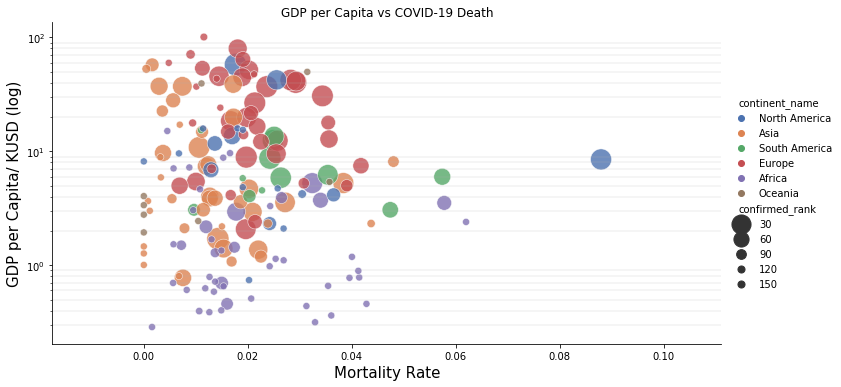

In [85]:

g=sns.relplot(data=map_data,y="GDP per capita", x="death_rate",hue="continent_name",
                  size='confirmed_rank', sizes=(500,50),size_order="rank",
             alpha=.8,height=5,    aspect=2,  palette="deep",
             
               size_norm=(0, 100),
               )      
g.set(yscale="log")

g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.ax.set_xlabel("Mortality Rate",fontsize=15)
g.ax.set_ylabel("GDP per Capita/ KUSD (log)",fontsize=15)
g.ax.set(title="GDP per Capita vs COVID-19 Death")


In [86]:
map_data.columns

Index(['date', 'death', 'recovery', 'confirmed', 'new_daily_confirmed',
       'new_daily_recovery', 'new_daily_death', 'lat', 'long', 'region',
       'death_rate', 'recovery_rate', 'continent_name', 'GDP', 'Year',
       'country_iso3', 'Country Name', 'Country Code', 'Population',
       'confirmed_rank', 'gdp_rank', 'GDP per capita Rank', 'GDP per capita',
       'death_rank', 'death_rate_rank'],
      dtype='object')

In [87]:

#map_data = map_data.assign(Product= lambda x:  x['death_rate'] < 0.01)
map_data['death_rank_cat'] = map_data['death_rate'].apply(lambda x: 'low' if x <= 0.01
                                                          else('medium' if x<=0.02
                                                              else ('high' if x<=0.03 else 'very high')))


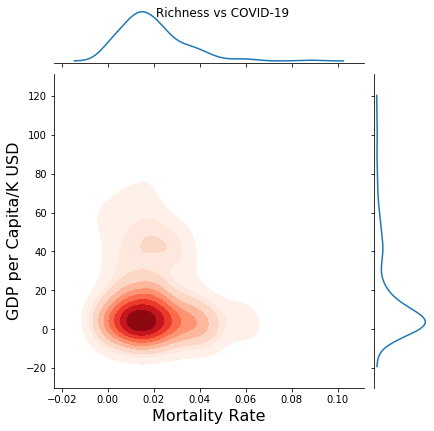

In [88]:
map_data_kde=map_data[['death_rate','GDP per capita','death_rank_cat','continent_name']]

#k=sns.kdeplot(data=map_data_kde, y="GDP per capita", x="confirmed_rank",color='r',cmap="Reds",shade=True)
k=sns.jointplot(
    data=map_data_kde,
    y="GDP per capita", x="death_rate", cmap="Reds",shade=True,
    kind="kde",
)
k.set_axis_labels('Mortality Rate', 'GDP per Capita/K USD', fontsize=16)
k.fig.suptitle("Richness vs COVID-19")

plt.show()